<a href="https://colab.research.google.com/github/jamg-upv/CAHOS19/blob/main/python/modeloOBJETIVO1_1y2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

direccion0='https://raw.githubusercontent.com/jamg-upv/CAHOS19/main/inputtables/dataset1fake1.csv'
df=pd.read_csv(direccion0, delimiter=';')

df.head(15)

,Id,edad,sexo,CNH,fechaingrehosp,fechaingreuci,fechaaltauci,fechaaltahosp,fechadefunc,fechatraslado,altadeftraslado,ComorbidityIndex
0,574,25,0,120115,2020-09-02,2020-09-08,2020-09-08,2020-09-08,NaN,NaN,a,"0,9797155"
1,1443,75,0,120115,2020-09-02,2020-09-18,2020-09-18,2020-09-18,2020-09-18,NaN,d,"12,19730955"
2,2210,75,0,120115,2020-09-02,2020-09-09,2020-10-01,2020-10-01,NaN,NaN,a,"16,12867379"
3,2986,45,0,120115,2020-09-02,2020-09-07,2020-09-07,2020-09-07,NaN,NaN,a,"1,89360647"
4,3271,55,0,120115,2020-09-02,2020-09-10,2020-09-10,2020-09-10,NaN,NaN,a,"3,3809675"
5,3447,55,0,120115,2020-09-02,2020-09-14,2020-09-14,2020-09-14,NaN,NaN,a,"2,84114916"
6,4525,55,0,120115,2020-09-02,2020-09-11,2020-09-11,2020-09-11,NaN,NaN,a,"4,545838656"
7,4994,85,0,120115,2020-09-02,2020-09-25,2020-09-25,2020-09-25,2020-09-25,NaN,d,"22,36426774"
8,6401,75,1,120115,2020-09-02,2020-09-17,2020-09-17,2020-09-17,NaN,NaN,a,"12,39619354"
9,6736,55,0,120115,2020-09-02,2020-09-12,2020-09-12,2020-09-12,NaN,NaN,a,"2,84114916"


In [ ]:
#Cogemos como muestra los primeros 200 días después del día 2020-09-15
#Los cálculos acabarían el día 2021-04-03
df2 = pd.DataFrame()
dias = pd.date_range('2020-09-15', periods=5, freq='D')
df2['date'] = dias
df2['count']=0

for row, fila in df2.iterrows():
  counter = 0
  for Id, user in df.iterrows():
    if (pd.to_datetime(user['fechaingrehosp']) <= pd.to_datetime(fila['date'])) & (pd.to_datetime(user['fechaaltahosp']) >= pd.to_datetime(fila['date'])):
      counter += 1
  df2.at[row, 'count'] = counter
df2

,date,count
0,2020-09-15,303
1,2020-09-16,319
2,2020-09-17,340
3,2020-09-18,346
4,2020-09-19,343


#OBJETIVO 1

In [ ]:
df2 = pd.DataFrame()
dias = pd.date_range('2020-09-15', periods=200, freq='D')
df2['date'] = dias
df2['count']=0
df2

,date,count
0,2020-09-15,0
1,2020-09-16,0
2,2020-09-17,0
3,2020-09-18,0
4,2020-09-19,0
...,...,...
195,2021-03-29,0
196,2021-03-30,0
197,2021-03-31,0
198,2021-04-01,0


In [ ]:
#Cogemos como muestra los primeros 200 días después del día 2020-09-15
#Los cálculos acabarían el día 2021-04-03
df2 = pd.DataFrame()
dias = pd.date_range('2020-09-15', periods=200, freq='D')
df2['date'] = dias
df2['count']=0

for row, fila in df2.iterrows():
  counter = 0
  for Id, user in df.iterrows():
    if (pd.to_datetime(user['fechaingrehosp']) <= pd.to_datetime(fila['date'])) & (pd.to_datetime(user['fechaaltahosp']) >= pd.to_datetime(fila['date'])):
      counter += 1
  df2.at[row, 'count'] = counter
df2


df2.to_csv('ocupacion.csv')


(array([737699., 737730., 737760., 737791., 737822., 737850., 737881.]),
 <a list of 7 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


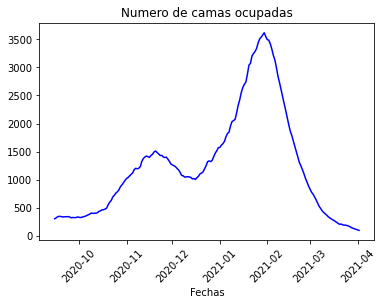

In [ ]:
#OCUPACIÓN DE CAMAS POR DÍA
x=df2['date']
y=df2['count']
plt.rcParams["figure.figsize"] = (6, 4)
plt.plot(x, y, color='B')
plt.title('Numero de camas ocupadas')
plt.xlabel('Fechas')
plt.xticks(rotation=45)

In [ ]:
#Cogemos como muestra los primeros 225 días después del día 2020-09-15
#Los cálculos acabarían el día 2021-04-28
df2 = pd.DataFrame()
dias = pd.date_range('2020-09-15', periods=225, freq='D')
df2['date'] = dias
df2['count']=0

for row, fila in df2.iterrows():
  counter = 0
  for Id, user in df.iterrows():
    if (pd.to_datetime(user['fechaingrehosp']) <= pd.to_datetime(fila['date'])) & (pd.to_datetime(user['fechaaltahosp']) >= pd.to_datetime(fila['date'])):
      counter += 1

  df2.at[row, 'count'] = counter

df2.to_csv('ocupacion225dias.csv')


(array([737699., 737730., 737760., 737791., 737822., 737850., 737881.,
        737911.]), <a list of 8 Text major ticklabel objects>)

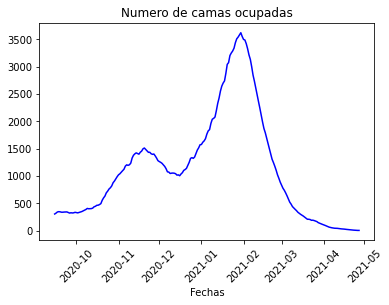

In [ ]:
#OCUPACIÓN DE CAMAS POR DÍA
x_2=df2['date']
y_2=df2['count']
plt.rcParams["figure.figsize"] = (6, 4)
plt.plot(x_2, y_2, color='B')
plt.title('Numero de camas ocupadas')
plt.xlabel('Fechas')
plt.xticks(rotation=45)

#OBJETIVO 2 - modelo lineal

In [ ]:
#Cogemos como muestra X días después del día 2020-10-15
#Esto es el preparado de datos poder hacer el objetivo 2
#Hay que coger los periodos de tiempo que más nos conviene

df2 = pd.DataFrame()
dias = pd.date_range('2021-02-01', periods=30, freq='D')
df2['date'] = dias
df2['count']=0

for row, fila in df2.iterrows():
  counter = 0
  for Id, user in df.iterrows():
    if (pd.to_datetime(user['fechaingrehosp']) <= pd.to_datetime(fila['date'])) & (pd.to_datetime(user['fechaaltahosp']) >= pd.to_datetime(fila['date'])):
      counter += 1

  df2.at[row, 'count'] = counter

df2.to_csv('ocupacion20dias.csv')
df2


NameError: ignored

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[3732.07103825 -113.30874317]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3521.
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           3.45e-20
Time:                        15:42:47   Log-Likelihood:                -93.845
No. Observations:                  18   AIC:                             191.7
Df Residuals:                      16   BIC:                             193.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3732.0710 

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


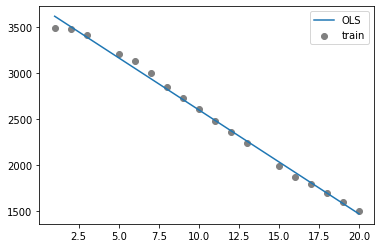

In [ ]:
#Statsmodels
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

ddm = []
#insertar datos en dos arrays. 
for row, fila in df2.iterrows():
  ddm.append(row+1)

#Lo pasamos a columnas del dataframe
df2['numdia']=ddm
X = df2['numdia']
y = df2['count']

# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
                                      X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.90,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

#Creación del modelo 
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.params)
print(modelo.summary())

#PREDICCIONES 

# Predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

#Gráfico del modelo
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray", label='train')
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.legend();


In [ ]:
X_test

array([[ 8],
       [11],
       [ 5]])

In [ ]:
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x,y
5,423.528763,13.506385,395.905104,451.152422,342.826991,504.230535,1.0,444
10,488.327352,12.381231,463.004891,513.649812,408.384019,568.270685,3.0,464
7,520.726646,11.833152,496.525132,544.928160,441.131277,600.322015,4.0,476
0,553.125940,11.296624,530.021750,576.230130,473.857327,632.394554,5.0,493
17,585.525235,10.773371,563.491216,607.559253,506.561905,664.488564,6.0,555
9,617.924529,10.265424,596.929379,638.919679,539.244761,696.604296,7.0,598
6,650.323823,9.775170,630.331356,670.316290,571.905661,728.741986,8.0,631
23,715.122412,8.859388,697.002929,733.241895,637.160722,793.084102,10.0,721
8,747.521706,8.440886,730.258156,764.785257,669.754492,825.288921,11.0,760
21,779.921000,8.054189,763.448335,796.393666,702.325523,857.516478,12.0,783


const     394.566387
numdia     32.328852
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2951.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           7.31e-34
Time:                        11:00:39   Log-Likelihood:                -173.63
No. Observations:                  35   AIC:                             351.3
Df Residuals:                      33   BIC:                             354.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

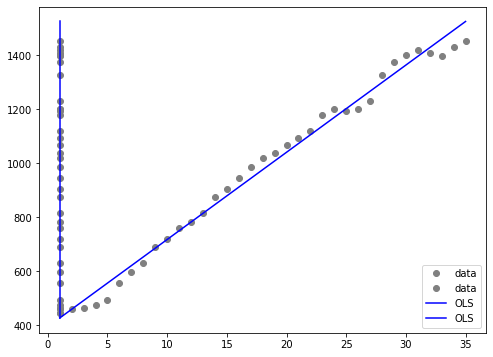

In [ ]:
#Statsmodels
import statsmodels.api as sm

ddm = []
#insertar datos en dos arrays. 
for row, fila in df2.iterrows():
  ddm.append(row+1)

df2['numdia']=ddm

# Establecer variables 
X = df2['numdia']
y = df2['count']

# Creación del modelo utilizando stats models
#X = sm.add_constant(X, prepend=True)
X = sm.add_constant(X)
modelo = sm.OLS(endog=y, exog=X)
resultado = modelo.fit()
print(resultado.params)
print(resultado.summary())

#Hacemos la gráfica
y_fitted = resultado.fittedvalues #PREDICCION
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, y, 'o', label='data', color='grey')
ax.plot(X, resultado.fittedvalues, label='OLS', color='b')
ax.legend()

#OBJETIVO 2 - modelo grado 2

In [ ]:
#Cogemos como muestra X días después del día 2020-10-15
#Esto es el preparado de datos poder hacer el objetivo 2
#Hay que coger los periodos de tiempo que más nos conviene

df2 = pd.DataFrame()
dias = pd.date_range('2021-02-01', periods=70, freq='D')
df2['date'] = dias
df2['count']=0

for row, fila in df2.iterrows():
  counter = 0
  for Id, user in df.iterrows():
    if (pd.to_datetime(user['fechaingrehosp']) <= pd.to_datetime(fila['date'])) & (pd.to_datetime(user['fechaaltahosp']) >= pd.to_datetime(fila['date'])):
      counter += 1

  df2.at[row, 'count'] = counter

df2.to_csv('ocupacion20dias.csv')
df2

,date,count
0,2021-02-01,3496
1,2021-02-02,3485
2,2021-02-03,3418
3,2021-02-04,3325
4,2021-02-05,3213
...,...,...
65,2021-04-07,51
66,2021-04-08,47
67,2021-04-09,43
68,2021-04-10,43


COEFICIENTES DE LA p2:
[ 1.41673602e+00 -1.44662725e+02  3.85142247e+03]


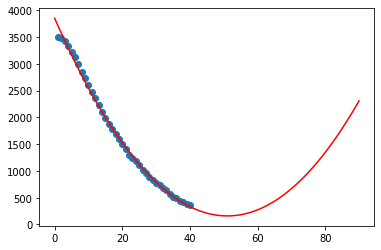

In [ ]:
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress


ddm = []
#insertar datos en dos arrays. 
for row, fila in df2.iterrows():
  ddm.append(row+1)

df2['numdia']=ddm

X = np.array(df2['numdia'])
y = np.array(df2['count'])

#HACEMOS EL MODELO DE GRADO 2
p2=np.polyfit(X,y,2)
print('COEFICIENTES DE LA p2:')
print(p2)

#PLOTEAMOS LOS MODELOS
plt.plot(X,y,'o')
xp = np.linspace(0,90,100)
plt.plot(xp,np.polyval(p2,xp),'r-')

In [ ]:
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

df2['numdia']=ddm

X= np.array(df2['numdia'])
y = np.array(df2['count'])

#HACEMOS EL MODELO DE GRADO 2
p2=np.polyfit(X,y,2)
print('COEFICIENTES DE LA p2:')
print(p2)
print('EVALUACIÓN DE LA p2')
yfit = p2[0] * X**2 + p2[1]*X + p2[2]
yresid= y - yfit
SSresid = np.sum(yresid**2)
SStotal = len(y) * np.var(y)
rsq = 1 - SSresid/SStotal
MSE = mean_squared_error(y, yfit)
print('MSE:' + str(MSE))
print('RSQ:')
print(rsq)
slope,intercept,r_value,p_value,std_err = linregress(X,y)
print(r_value**2)
print('p_value:')
print(p_value)

#PLOTEAMOS LOS MODELOS
plt.plot(X,y,'o')
xp = np.linspace(0,90,100)
plt.plot(xp,np.polyval(p2,xp),'r-')

#CITACIONES

In [ ]:
#CITACIONES
@inproceedings{seabold2010statsmodels,
  title={Statsmodels: Econometric and statistical modeling with python},
  author={Seabold, Skipper and Perktold, Josef},
  booktitle={9th Python in Science Conference},
  year={2010},
}